# Project - Predictive Modelling

## Import Libraries

1. General libraries to work with data and visualize data:

In [1]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. sklearn libraries to perform regression and classifications:

In [2]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2. Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 3. CART
from sklearn.tree import DecisionTreeClassifier

3. To check model performance:

In [3]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

4. To visualize the decision tree:

In [4]:
# To visualize the decision tree

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

##--conda install pydot
##--conda install -c anaconda graphviz

# 2 Logistic Regression, LDA, CART

Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

## 2.1 Data Ingestion:

Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

### Read dataset and explore

In [5]:
cData= pd.read_csv('Car_Crash.csv')

In [6]:
cData.shape

(11217, 16)

There are 1473 rows and 10 columns in the dataset

In [7]:
cData.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [8]:
cData.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [9]:
cData.drop(['Unnamed: 0','caseid'], axis=1, inplace=True)

In [10]:
cData.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0


In [11]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [12]:
cData.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
dtype: object

Most of the numerical columns are of type float64, int64 already.

'Survived', 'airbag', 'seatbelt','sex','abcat','occRole' can be encoded, some using data dictionary provided.

In [13]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [14]:
cData.describe(include='object').T

,count,unique,top,freq
dvcat,11217,5,10-24,5414
Survived,11217,2,survived,10037
airbag,11217,2,airbag,7064
seatbelt,11217,2,belted,7849
sex,11217,2,m,6048
abcat,11217,3,deploy,4365
occRole,11217,2,driver,8786


In [15]:
object_columns = [
    'dvcat', 'Survived', 'airbag', 'frontal', 'seatbelt', 'sex', 'abcat',
    'occRole', 'deploy', 'injSeverity'
]

In [16]:
non_object_columns =['weight',
 'ageOFocc',
 'yearacc',
 'yearVeh',]

In [17]:
object_columns

['dvcat',
 'Survived',
 'airbag',
 'frontal',
 'seatbelt',
 'sex',
 'abcat',
 'occRole',
 'deploy',
 'injSeverity']

In [18]:
non_object_columns

['weight', 'ageOFocc', 'yearacc', 'yearVeh']

### Missing Values

In [19]:
cData.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
dtype: int64

In [20]:
cData.apply(lambda x: x.isnull().value_counts())

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
False,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11217.0,11140
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77


There are 71 missing values in Wife_age column, 21 missing values in No_of_children_born column

In [21]:
cData['injSeverity'].describe()

count    11140.000000
mean         1.825583
std          1.378535
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: injSeverity, dtype: float64

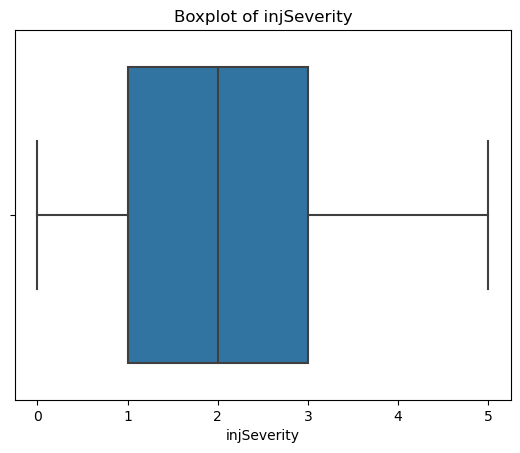

In [22]:
sns.boxplot(x= 'injSeverity', data=cData)
plt.title('Boxplot of injSeverity')
plt.show()

the 'injSeverity' does not have outliers. Data is very lightly right skewed. Hence, the missing values can be imputed based on median. Mean can also be used as there is no high skewedness in data.

#### Treat Null/Missing Values

In [23]:
cData['injSeverity'].fillna(cData['injSeverity'].median(), inplace=True)

In [24]:
cData.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [25]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


There are no missing values in the dataset now.

### Univariate Analysis

<Figure size 1000x600 with 0 Axes>

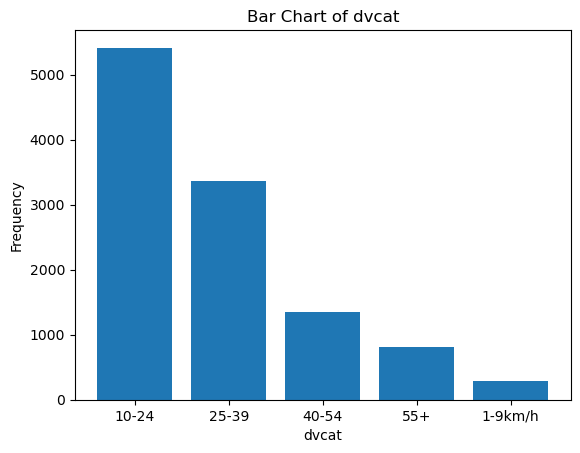

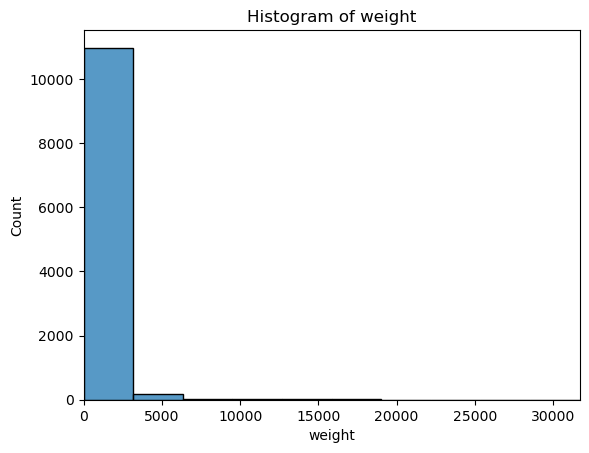

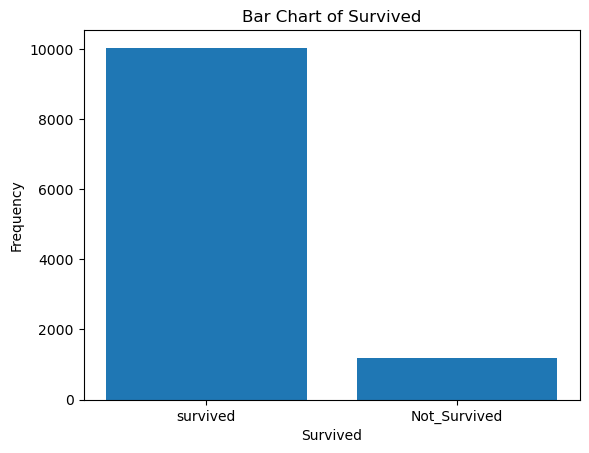

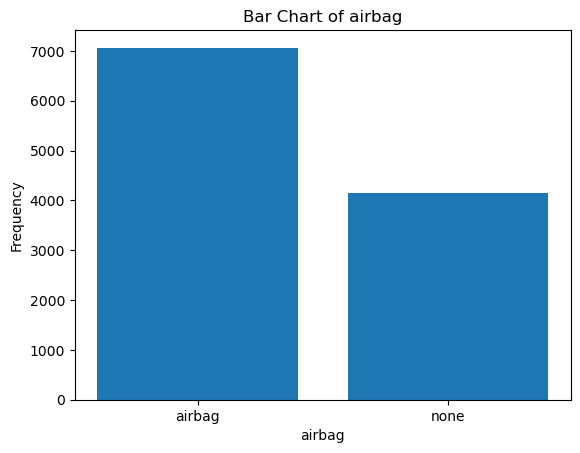

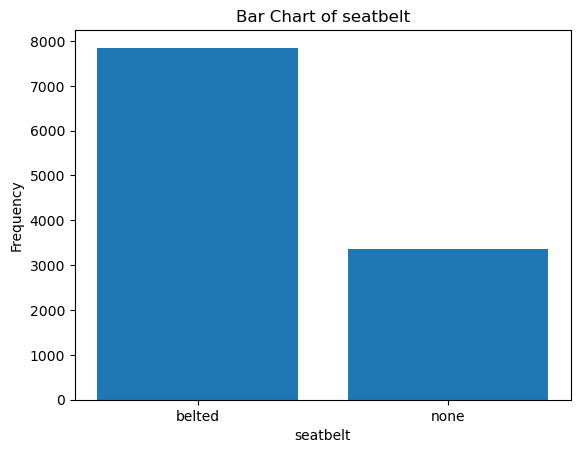

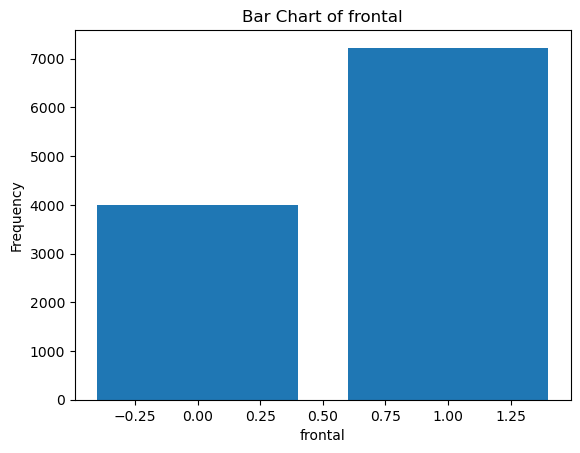

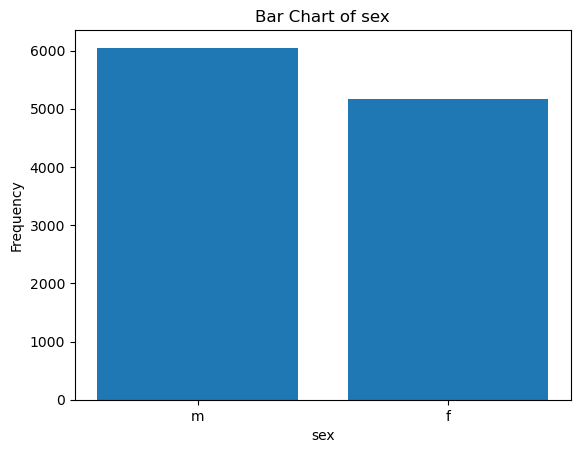

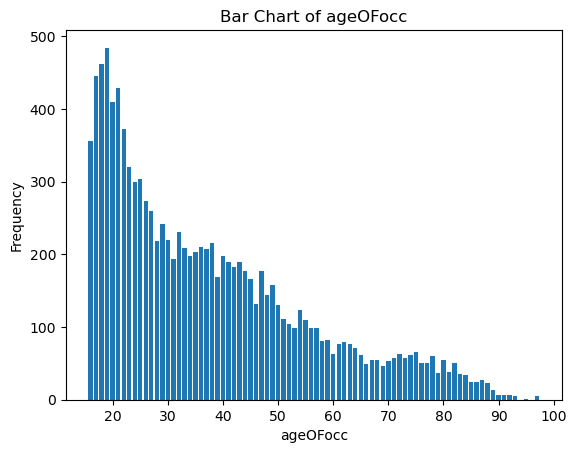

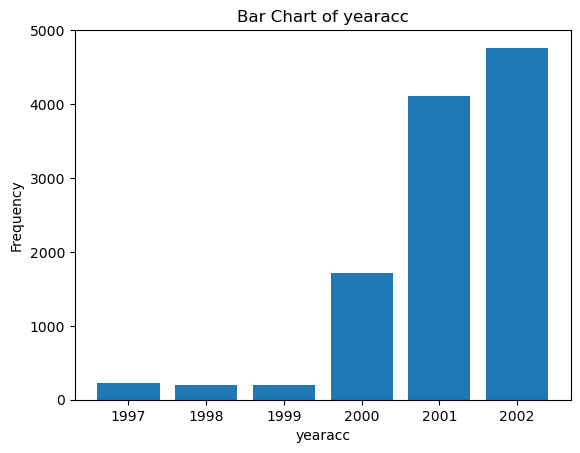

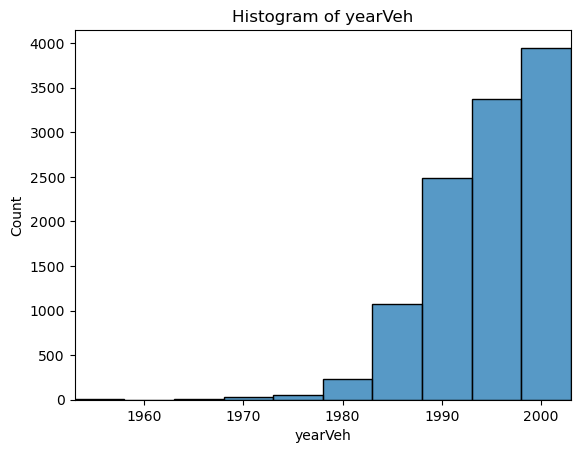

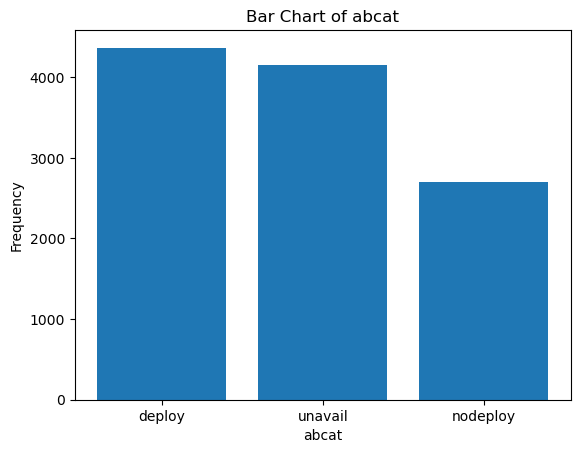

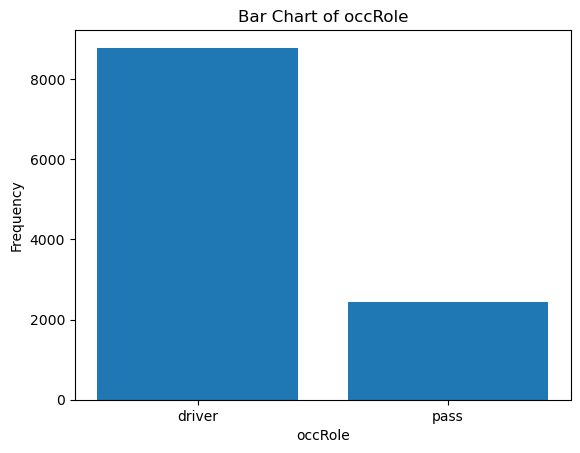

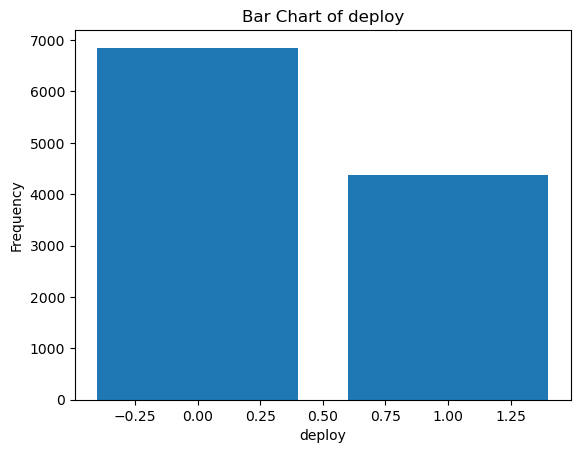

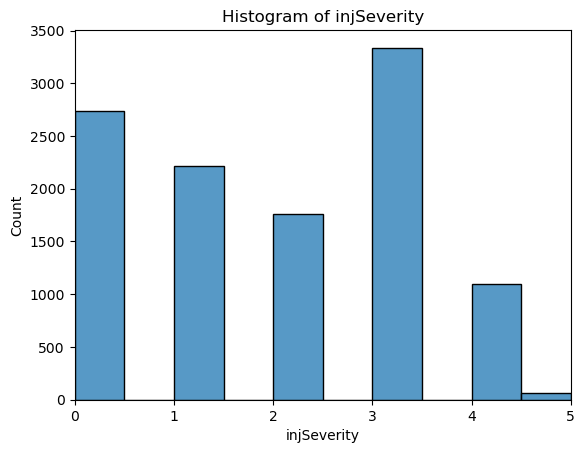

In [26]:
plt.figure(figsize=(10,6))
    # Loop through each column in the DataFrame
for column in cData.columns:
    # Plot a histogram for numerical columns
    if cData[column].dtype in [int, float]:
        plt.figure()
        sns.histplot(cData[column], bins=10)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Histogram of {column}')
        # Set x-axis limits based on the data range
        plt.xlim(cData[column].min(), cData[column].max())

    # Plot a bar chart for categorical columns
    else:
        value_counts = cData[column].value_counts()
        plt.figure()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Bar Chart of {column}')

    # Show the plot
    plt.show()

### Bivariate Analysis

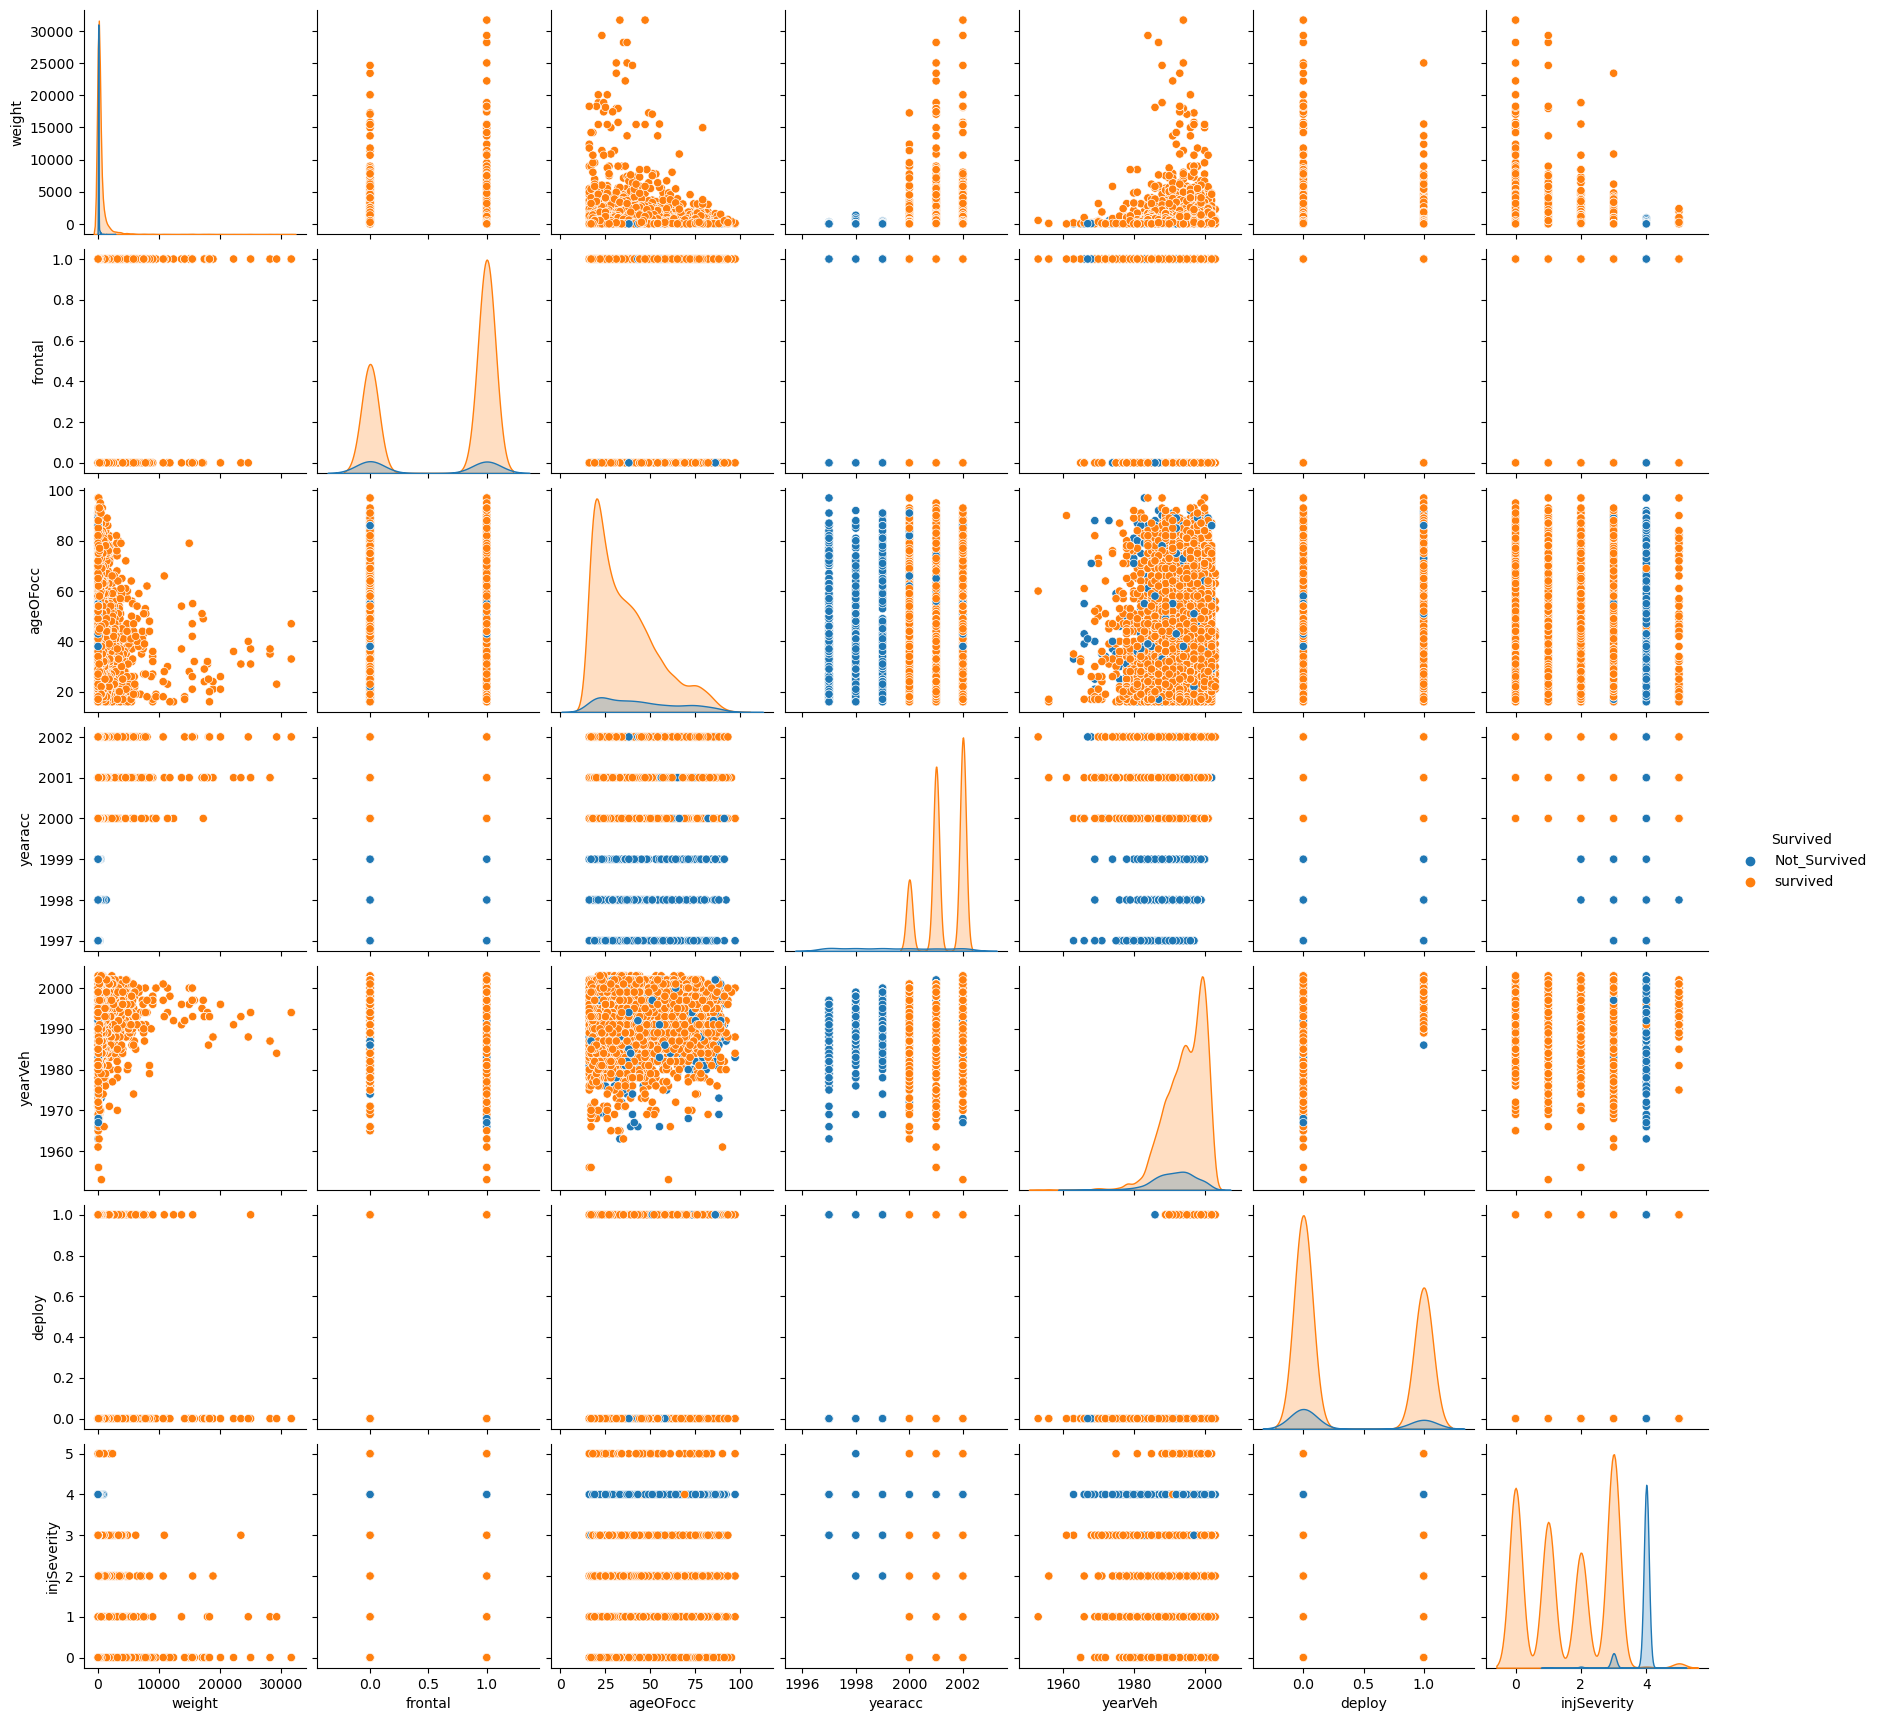

In [27]:
sns.pairplot(cData, hue='Survived', diag_kind='kde');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## 2.2 Data Preparation

Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

### 2.2.1 Encode Data

In [28]:
for i in cData.columns:
    if cData[i].dtypes== 'object':
        print(i, ': \n')
        print(cData[i].value_counts())
        print('       ****       ')

dvcat : 

10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64
       ****       
Survived : 

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64
       ****       
airbag : 

airbag    7064
none      4153
Name: airbag, dtype: int64
       ****       
seatbelt : 

belted    7849
none      3368
Name: seatbelt, dtype: int64
       ****       
sex : 

m    6048
f    5169
Name: sex, dtype: int64
       ****       
abcat : 

deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64
       ****       
occRole : 

driver    8786
pass      2431
Name: occRole, dtype: int64
       ****       


In [29]:
## Convert the variable to Nominal

cData['dvcat']=np.where(cData['dvcat'] =='1-9km/h', '1', cData['dvcat'])
cData['dvcat']=np.where(cData['dvcat'] =='10-24', '2', cData['dvcat'])

cData['dvcat']=np.where(cData['dvcat'] =='25-39', '3', cData['dvcat'])
cData['dvcat']=np.where(cData['dvcat'] =='40-54', '4', cData['dvcat'])
cData['dvcat']=np.where(cData['dvcat'] =='55+', '5', cData['dvcat'])

In [30]:
## Convert the variable to Nominal

cData['Survived']=np.where(cData['Survived'] =='survived', '1', cData['Survived'])
cData['Survived']=np.where(cData['Survived'] =='Not_Survived', '0', cData['Survived'])

In [31]:
## Convert the variable to Nominal

cData['airbag']=np.where(cData['airbag'] =='airbag', '1', cData['airbag'])
cData['airbag']=np.where(cData['airbag'] =='none', '0', cData['airbag'])

In [32]:
## Convert the variable to Nominal

cData['seatbelt']=np.where(cData['seatbelt'] =='belted', '1', cData['seatbelt'])
cData['seatbelt']=np.where(cData['seatbelt'] =='none', '0', cData['seatbelt'])

In [33]:
## Convert the variable to Nominal

cData['sex']=np.where(cData['sex'] =='f', '1', cData['sex'])
cData['sex']=np.where(cData['sex'] =='m', '0', cData['sex'])

In [34]:
## Convert the variable to Nominal

cData['abcat']=np.where(cData['abcat'] =='deploy', '1', cData['abcat'])
cData['abcat']=np.where(cData['abcat'] =='unavail', '0', cData['abcat'])

cData['abcat']=np.where(cData['abcat'] =='nodeploy', '0', cData['abcat'])

In [35]:
## Convert the variable to Nominal

cData['occRole']=np.where(cData['occRole'] =='driver', '1', cData['occRole'])
cData['occRole']=np.where(cData['occRole'] =='pass', '0', cData['occRole'])

In [36]:
cData.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,5,27.078,0,0,0,1,0,32,1997,1987.0,0,1,0,4.0
1,3,89.627,0,1,1,0,1,54,1997,1994.0,0,1,0,4.0
2,5,27.078,0,0,1,1,0,67,1997,1992.0,0,1,0,4.0
3,5,27.078,0,0,1,1,1,64,1997,1992.0,0,0,0,4.0
4,5,13.374,0,0,0,1,0,23,1997,1986.0,0,1,0,4.0


In [37]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [38]:
#fix
# let's convert the object column from object type to float type
for i in cData.columns:
    if cData[i].dtypes == 'object':
        cData[i] = cData[i].astype('int64')

In [39]:
cData['yearVeh'] = cData['yearVeh'].astype('int64')
cData['injSeverity'] = cData['injSeverity'].astype('int64')

In [40]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int64  
 3   airbag       11217 non-null  int64  
 4   seatbelt     11217 non-null  int64  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int64  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  int64  
 11  occRole      11217 non-null  int64  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.2 MB


In [41]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
dvcat,11217.0,2.731122,0.958810,1.0,2.000,2.000,3.000,5.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217.0,0.894803,0.306821,0.0,1.000,1.000,1.000,1.00
airbag,11217.0,0.629758,0.482891,0.0,0.000,1.000,1.000,1.00
seatbelt,11217.0,0.699741,0.458391,0.0,0.000,1.000,1.000,1.00
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
sex,11217.0,0.460818,0.498485,0.0,0.000,0.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00


In [42]:
# Loop through each column in the DataFrame
for column in cData.columns:
    # Check for 0 or missing data
    num_zeros = (cData[column] == 0).sum()
    num_missing = cData[column].isnull().sum()
    num_question_marks = (cData[column] == '?').sum()
    np_nan = (cData[column] == np.NaN).sum()

    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(cData[column]):
        print(f"{column}: Numerical data")
    print(f"Feature: {column}")
    print(f"Number of zeros: {num_zeros}")
    print(f"Number of missing values: {num_missing}")
    print(f"Number of '?' values: {num_question_marks}")
    print('No of np.Nan', np_nan)
    print("-" * 20)

dvcat: Numerical data
Feature: dvcat
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
weight: Numerical data
Feature: weight
Number of zeros: 19
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
Survived: Numerical data
Feature: Survived
Number of zeros: 1180
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
airbag: Numerical data
Feature: airbag
Number of zeros: 4153
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
seatbelt: Numerical data
Feature: seatbelt
Number of zeros: 3368
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
frontal: Numerical data
Feature: frontal
Number of zeros: 3993
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
sex: Numerical data
Feature: sex
Number of zeros: 6048
Number of missing values: 0
Number of '?' values

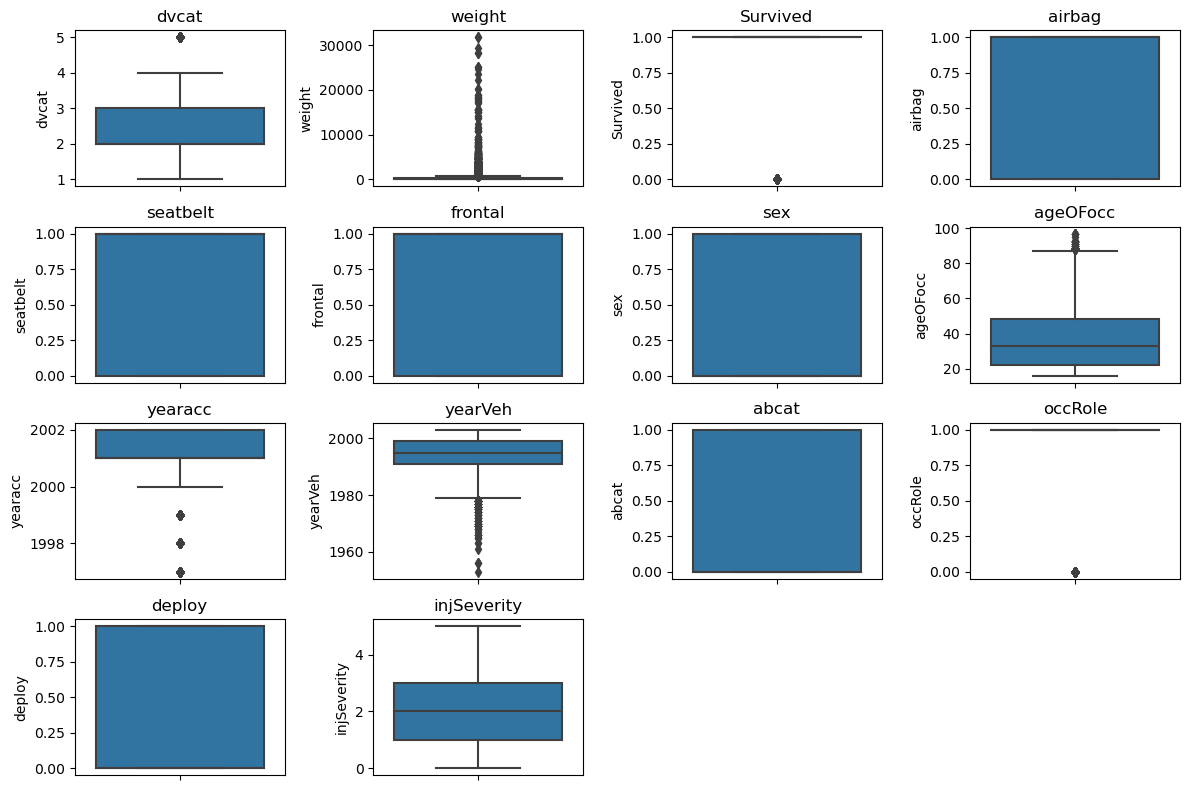

In [43]:
plt.figure(figsize=(12, 8))
feature_list = cData.columns

for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=cData[feature_list[i]], data=cData)
    plt.title(feature_list[i])
    plt.tight_layout()

Treat Outliers:

In [44]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [45]:
outliers_col = ['dvcat', 'weight']
for i in outliers_col:
    LL,UL=remove_outlier(cData[i])
    cData[i] = np.where(cData[i] > UL, UL, cData[i])
    cData[i] = np.where(cData[i] < LL, LL, cData[i])

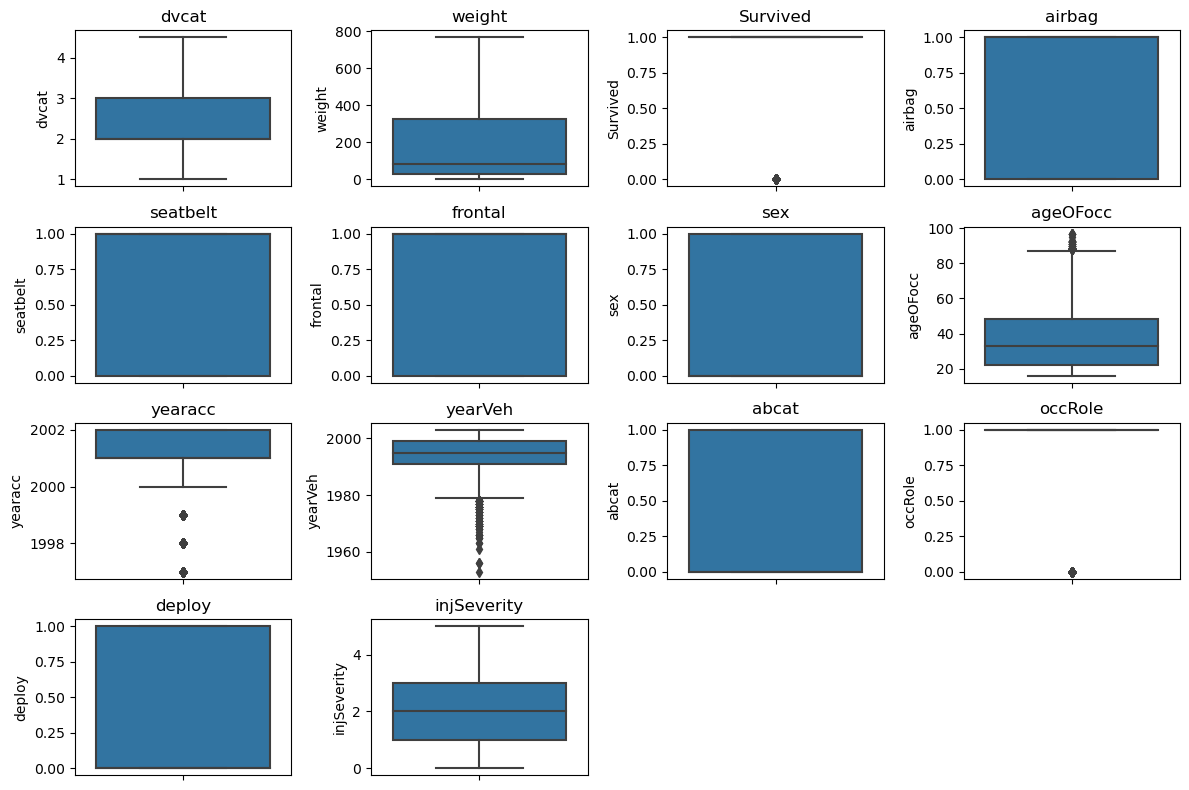

In [46]:
plt.figure(figsize=(12, 8))
feature_list = cData.columns

for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=cData[feature_list[i]], data=cData)
    plt.title(feature_list[i])
    plt.tight_layout()

### Co-relation

In [47]:
cData.corr()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
dvcat,1.000000,-0.328758,-0.398861,-0.160170,-0.204722,0.051775,-0.072912,-0.032433,-0.225576,-0.164878,0.061807,0.014205,0.061807,0.470624
weight,-0.328758,1.000000,0.217553,0.030551,0.148622,-0.010311,0.023925,-0.048719,0.151885,0.017063,-0.091799,0.028868,-0.091799,-0.455644
Survived,-0.398861,0.217553,1.000000,0.139679,0.206467,0.107990,0.046499,-0.135473,0.549885,0.165096,0.054346,0.023460,0.054346,-0.520610
airbag,-0.160170,0.030551,0.139679,1.000000,0.157501,-0.050272,0.092886,0.025109,0.181478,0.766181,0.611983,0.086011,0.611983,-0.124899
seatbelt,-0.204722,0.148622,0.206467,0.157501,1.000000,-0.066590,0.117071,0.066066,0.149208,0.180534,0.044132,0.047712,0.044132,-0.284477
frontal,0.051775,-0.010311,0.107990,-0.050272,-0.066590,1.000000,-0.055639,-0.048856,0.059768,-0.024267,0.260388,0.033721,0.260388,-0.054166
sex,-0.072912,0.023925,0.046499,0.092886,0.117071,-0.055639,1.000000,0.063575,0.025957,0.097390,0.036143,-0.116228,0.036143,0.021529
ageOFocc,-0.032433,-0.048719,-0.135473,0.025109,0.066066,-0.048856,0.063575,1.000000,-0.072271,-0.002070,-0.009556,0.052485,-0.009556,0.124166
yearacc,-0.225576,0.151885,0.549885,0.181478,0.149208,0.059768,0.025957,-0.072271,1.000000,0.247743,0.091252,0.018217,0.091252,-0.302641
yearVeh,-0.164878,0.017063,0.165096,0.766181,0.180534,-0.024267,0.097390,-0.002070,0.247743,1.000000,0.452448,0.018416,0.452448,-0.139503


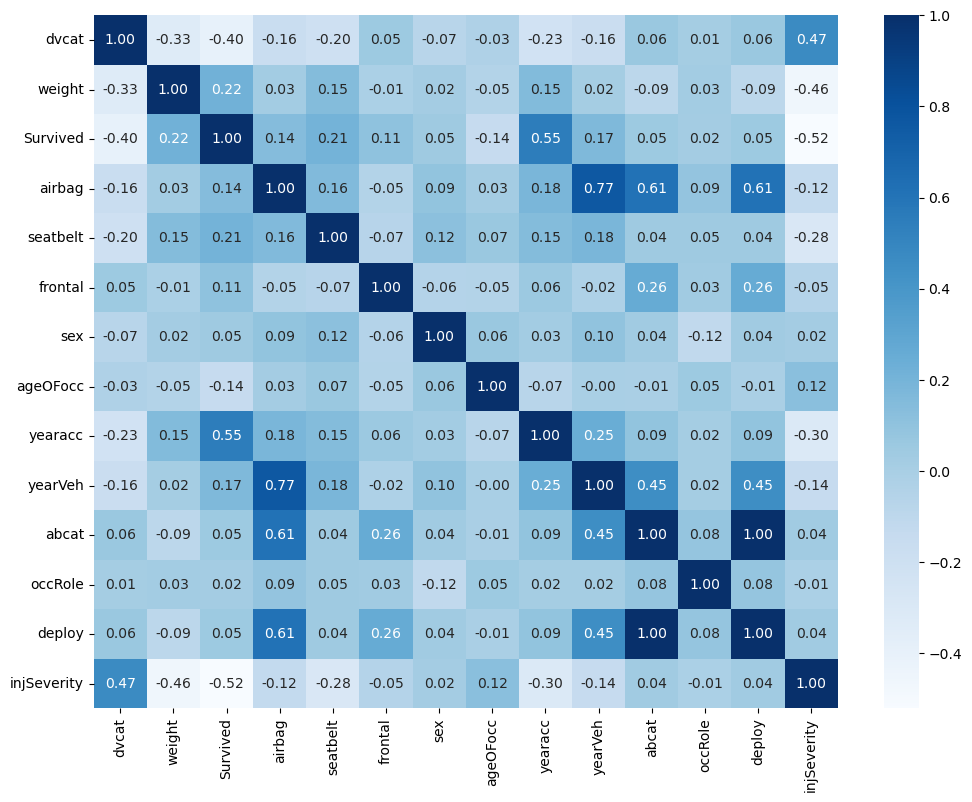

In [48]:
plt.figure(figsize=(12,9))
sns.heatmap(cData.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

### Binning

In [49]:
for i in cData.columns:
        print(i, ': \n')
        print(cData[i].value_counts())
        print('       ****       ')

dvcat : 

2.0    5414
3.0    3368
4.0    1344
4.5     809
1.0     282
Name: dvcat, dtype: int64
       ****       
weight : 

767.702    1412
1.000        65
72.176       57
38.994       53
54.303       52
           ... 
69.662        1
47.033        1
256.476       1
71.127        1
488.904       1
Name: weight, Length: 3705, dtype: int64
       ****       
Survived : 

1    10037
0     1180
Name: Survived, dtype: int64
       ****       
airbag : 

1    7064
0    4153
Name: airbag, dtype: int64
       ****       
seatbelt : 

1    7849
0    3368
Name: seatbelt, dtype: int64
       ****       
frontal : 

1    7224
0    3993
Name: frontal, dtype: int64
       ****       
sex : 

0    6048
1    5169
Name: sex, dtype: int64
       ****       
ageOFocc : 

19    484
18    461
17    445
21    428
20    410
     ... 
90      7
92      6
97      5
93      5
95      1
Name: ageOFocc, Length: 80, dtype: int64
       ****       
yearacc : 

2002    4764
2001    4115
2000    1716
1997     224


In [50]:
cData[['yearVeh','airbag']].corr()

,yearVeh,airbag
yearVeh,1.000000,0.766181
airbag,0.766181,1.000000


#### Year of Accident

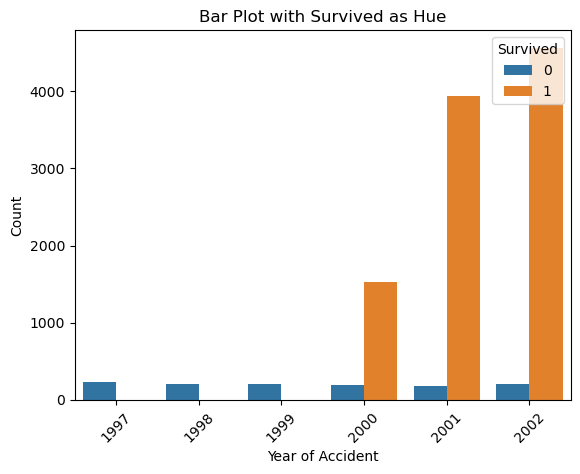

In [51]:
# Create the bar plot
sns.countplot(data=cData, x='yearacc', hue='Survived')
# Set the labels and title
plt.xlabel('Year of Accident')
plt.ylabel('Count')
plt.title('Bar Plot with Survived as Hue')
plt.xticks(rotation=45)
plt.show()

In [52]:
# Create a new column 'yearAcc_Bin' with two bins
bins = [min(cData['yearacc'])-1, 2000, max(cData['yearacc'])+1]
labels = ['Before 2000s', 'After 2000s']
cData['yearAcc_Bin'] = pd.cut(cData['yearacc'], bins=bins, labels=labels, right=False)

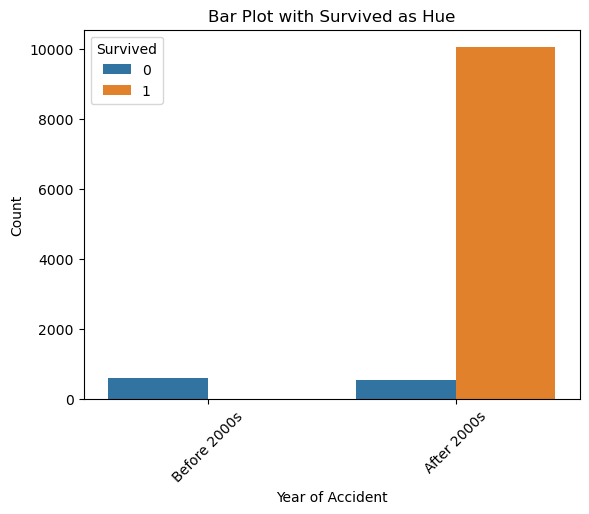

In [53]:
# Create the bar plot
sns.countplot(data=cData, x='yearAcc_Bin', hue='Survived')
# Set the labels and title
plt.xlabel('Year of Accident')
plt.ylabel('Count')
plt.title('Bar Plot with Survived as Hue')
plt.xticks(rotation=45)
plt.show()

In [54]:
cData['yearAcc_Bin']=np.where(cData['yearAcc_Bin'] =='Before 2000s', '0', cData['yearAcc_Bin'])
cData['yearAcc_Bin']=np.where(cData['yearAcc_Bin'] =='After 2000s', '1', cData['yearAcc_Bin'])

In [55]:
cData.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,yearAcc_Bin
0,4.5,27.078,0,0,0,1,0,32,1997,1987,0,1,0,4,0
1,3.0,89.627,0,1,1,0,1,54,1997,1994,0,1,0,4,0
2,4.5,27.078,0,0,1,1,0,67,1997,1992,0,1,0,4,0
3,4.5,27.078,0,0,1,1,1,64,1997,1992,0,0,0,4,0
4,4.5,13.374,0,0,0,1,0,23,1997,1986,0,1,0,4,0


This shows a clear distinction that accidents before 2000s resulted only in 'NotSurvived'. Based on this information, the year of accident is encoded into binary variable i.e. before 2000s as 0, after 2000s as 1

#### Year of Vehicle

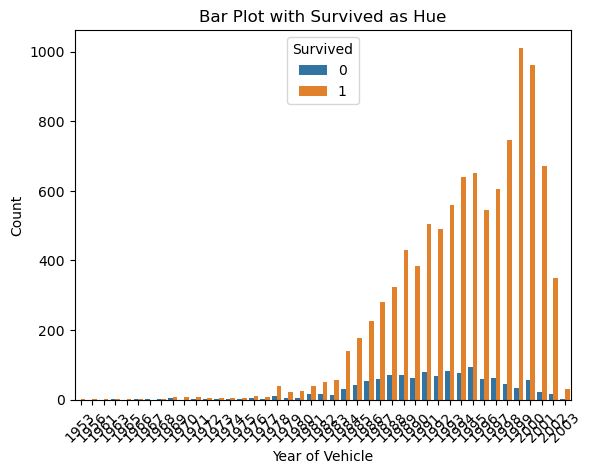

In [56]:
# Create the bar plot
sns.countplot(data=cData, x='yearVeh', hue='Survived')
# Set the labels and title
plt.xlabel('Year of Vehicle')
plt.ylabel('Count')
plt.title('Bar Plot with Survived as Hue')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Define the bin edges
bin_edges = [min(cData['yearVeh'])-1, 1980, 1990, 2000, cData['yearVeh'].max()+1]

# Define the bin labels
bin_labels = ['Before 1980s', '1980-1990', '1990-2000', '2000+']

# Bin the 'YearOfVehicle' variable
cData['yearVeh_bin'] = pd.cut(cData['yearVeh'], bins=bin_edges, labels=bin_labels, right=False)


In [58]:
cData['yearVeh_bin'].value_counts()

1990-2000       6805
1980-1990       2125
2000+           2112
Before 1980s     175
Name: yearVeh_bin, dtype: int64

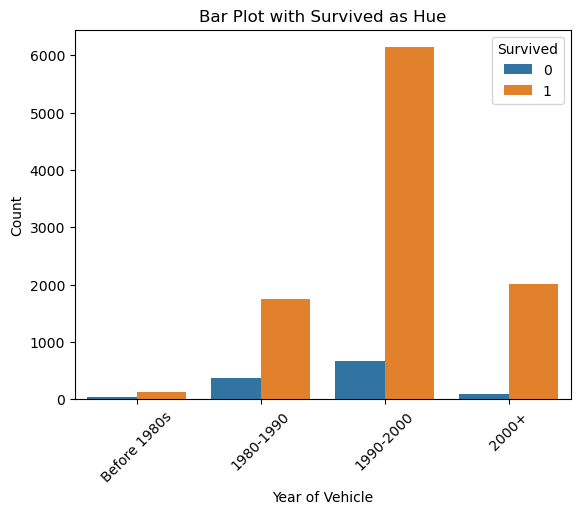

In [59]:
# Create the bar plot
sns.countplot(data=cData, x='yearVeh_bin', hue='Survived')
# Set the labels and title
plt.xlabel('Year of Vehicle')
plt.ylabel('Count')
plt.title('Bar Plot with Survived as Hue')
plt.xticks(rotation=45)
plt.show()

In [60]:
cData['yearVeh_bin']=np.where(cData['yearVeh_bin'] =='Before 1980s', '1', cData['yearVeh_bin'])
cData['yearVeh_bin']=np.where(cData['yearVeh_bin'] =='1980-1990', '2', cData['yearVeh_bin'])
cData['yearVeh_bin']=np.where(cData['yearVeh_bin'] =='1990-2000', '3', cData['yearVeh_bin'])
cData['yearVeh_bin']=np.where(cData['yearVeh_bin'] =='2000+', '4', cData['yearVeh_bin'])

In [61]:
cData.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,yearAcc_Bin,yearVeh_bin
0,4.5,27.078,0,0,0,1,0,32,1997,1987,0,1,0,4,0,2
1,3.0,89.627,0,1,1,0,1,54,1997,1994,0,1,0,4,0,3
2,4.5,27.078,0,0,1,1,0,67,1997,1992,0,1,0,4,0,3
3,4.5,27.078,0,0,1,1,1,64,1997,1992,0,0,0,4,0,3
4,4.5,13.374,0,0,0,1,0,23,1997,1986,0,1,0,4,0,2


Inference:

Compared to older version cars, passengers/drivers using latest version cars have drastically higher chance of survival.
This can be attributed to the airbag facilities in latest cars

#### 'Year of Occupant'

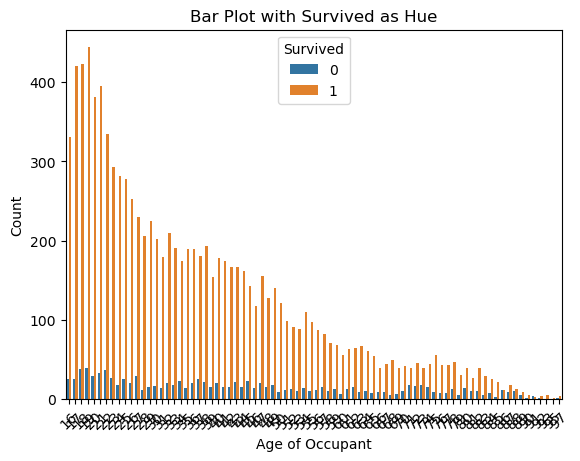

In [62]:
# Create the bar plot
sns.countplot(data=cData, x='ageOFocc', hue='Survived')
# Set the labels and title
plt.xlabel('Age of Occupant')
plt.ylabel('Count')
plt.title('Bar Plot with Survived as Hue')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Calculate quartiles to identify bin boundaries
age_series=cData['ageOFocc']
q1 = age_series.quantile(0.25)
q2 = age_series.quantile(0.5)
q3 = age_series.quantile(0.75)

# Define the age bins based on quartiles
age_bins = [age_series.min()-1, q1, q2, q3, age_series.max()+1]

In [64]:
bin_labels = [ '1', '2', '3','4']  # Adjust labels as per your requirement

# Create a new variable and assign bin labels
cData['ageOFocc_bin'] = np.digitize(age_series, age_bins, right=True)
cData['ageOFocc_bin'] = cData['ageOFocc_bin'].map(dict(zip(range(1, len(bin_labels) + 1), bin_labels)))

In [65]:
cData['ageOFocc_bin'].value_counts()

1    2956
2    2766
3    2757
4    2738
Name: ageOFocc_bin, dtype: int64

In [66]:
cData.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,yearAcc_Bin,yearVeh_bin,ageOFocc_bin
0,4.5,27.078,0,0,0,1,0,32,1997,1987,0,1,0,4,0,2,2
1,3.0,89.627,0,1,1,0,1,54,1997,1994,0,1,0,4,0,3,4
2,4.5,27.078,0,0,1,1,0,67,1997,1992,0,1,0,4,0,3,4
3,4.5,27.078,0,0,1,1,1,64,1997,1992,0,0,0,4,0,3,4
4,4.5,13.374,0,0,0,1,0,23,1997,1986,0,1,0,4,0,2,2


Inferences:

the created Age Bins are roughly equivalent of Teens, Young Adults, Middle Ages, 50+.

#### Crash Percentages

In [68]:
# Filter the data for driver occupants
driver_data = cData[cData['occRole'] == '1'] #Driver is '1'

# Calculate the total number of crashes for each age group
crash_counts = driver_data['ageOFocc_bin'].value_counts()

# Calculate the percentages of crashes based on age
crash_percentages = (crash_counts / crash_counts.sum()) * 100

# Print the percentages of crashes based on age
print(crash_percentages)

Series([], Name: ageOFocc_bin, dtype: float64)


In [69]:
cData['occRole'].value_counts()

1    8786
0    2431
Name: occRole, dtype: int64

In [70]:
# Filter the data for driver occupants
driver_data = cData[cData['occRole'] == '1'] #Driver is '1'

# Calculate the total number of crashes for each age group
crash_counts = driver_data['yearVeh_bin'].value_counts()

# Calculate the percentages of crashes based on age
crash_percentages = (crash_counts / crash_counts.sum()) * 100

# Print the percentages of crashes based on age
print(crash_percentages)

Series([], Name: yearVeh_bin, dtype: float64)


The vehicles from 1990-2000 are involved in 61% and vehicles after 2000 account for 18% of the crashes.

In [71]:
# Loop through each column in the DataFrame
for column in cData.columns:
    # Check for 0 or missing data
    num_zeros = (cData[column] == 0).sum()
    num_missing = cData[column].isnull().sum()
    num_question_marks = (cData[column] == '?').sum()
    np_nan = (cData[column] == np.NaN).sum()

    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(cData[column]):
        print(f"{column}: Numerical data")
    print(f"Feature: {column}")
    print(f"Number of zeros: {num_zeros}")
    print(f"Number of missing values: {num_missing}")
    print(f"Number of '?' values: {num_question_marks}")
    print('No of np.Nan', np_nan)
    print("-" * 20)

dvcat: Numerical data
Feature: dvcat
Number of zeros: 0
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
weight: Numerical data
Feature: weight
Number of zeros: 19
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
Survived: Numerical data
Feature: Survived
Number of zeros: 1180
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
airbag: Numerical data
Feature: airbag
Number of zeros: 4153
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
seatbelt: Numerical data
Feature: seatbelt
Number of zeros: 3368
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
frontal: Numerical data
Feature: frontal
Number of zeros: 3993
Number of missing values: 0
Number of '?' values: 0
No of np.Nan 0
--------------------
sex: Numerical data
Feature: sex
Number of zeros: 6048
Number of missing values: 0
Number of '?' values

### 2.2.2 Split Data

In [72]:
X= cData.drop(['Survived','yearacc','yearVeh','ageOFocc'], axis=1)
y= cData['Survived']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= .3, random_state= 1, stratify=y)

In [73]:
X_train.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,abcat,occRole,deploy,injSeverity,yearAcc_Bin,yearVeh_bin,ageOFocc_bin
7778,2.0,207.690,1,1,1,1,1,0,1,1,1,3,3
9606,3.0,155.956,1,0,1,1,1,1,1,1,1,4,1
1085,4.0,9.780,0,1,1,1,0,1,0,3,1,3,1
9197,2.0,65.896,1,1,0,0,0,1,0,0,1,4,1
5698,3.0,9.285,0,0,1,0,0,1,0,3,1,3,4


In [74]:
X_test.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,abcat,occRole,deploy,injSeverity,yearAcc_Bin,yearVeh_bin,ageOFocc_bin
4985,2.0,49.959,0,1,1,1,0,0,0,3,1,3,4
2442,4.5,69.484,0,1,1,0,0,1,0,2,1,2,3
7358,2.0,19.866,1,0,1,1,0,1,0,3,1,4,4
8396,1.0,53.227,1,1,1,1,0,0,0,2,1,3,4
3601,2.0,31.469,1,1,0,0,1,1,1,3,1,3,2


### 2.2.3 Logistic Regression, LDA, CART

In [75]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion='gini'))]

The models and the hyper parameters used are Logistic Regression with max_iter=1000, LDA with n_components=1, CART with criterion='gini'

In [76]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
#dtree.feature_importances_
imp_df_dtree =pd.DataFrame(dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df_dtree['Imp'].sort_values()

occRole         0.001082
abcat           0.001437
deploy          0.001581
seatbelt        0.001953
airbag          0.002816
ageOFocc_bin    0.003249
sex             0.003514
yearVeh_bin     0.003794
frontal         0.004831
dvcat           0.005695
weight          0.035250
yearAcc_Bin     0.041527
injSeverity     0.893271
Name: Imp, dtype: float64

CART Tree visualizing:

In [78]:
train_char_label=['1','0']
print(list(X_train))

['dvcat', 'weight', 'airbag', 'seatbelt', 'frontal', 'sex', 'abcat', 'occRole', 'deploy', 'injSeverity', 'yearAcc_Bin', 'yearVeh_bin', 'ageOFocc_bin']


In [79]:
cData_dot_data = StringIO()
export_graphviz(dtree,out_file= cData_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(cData_dot_data.getvalue())

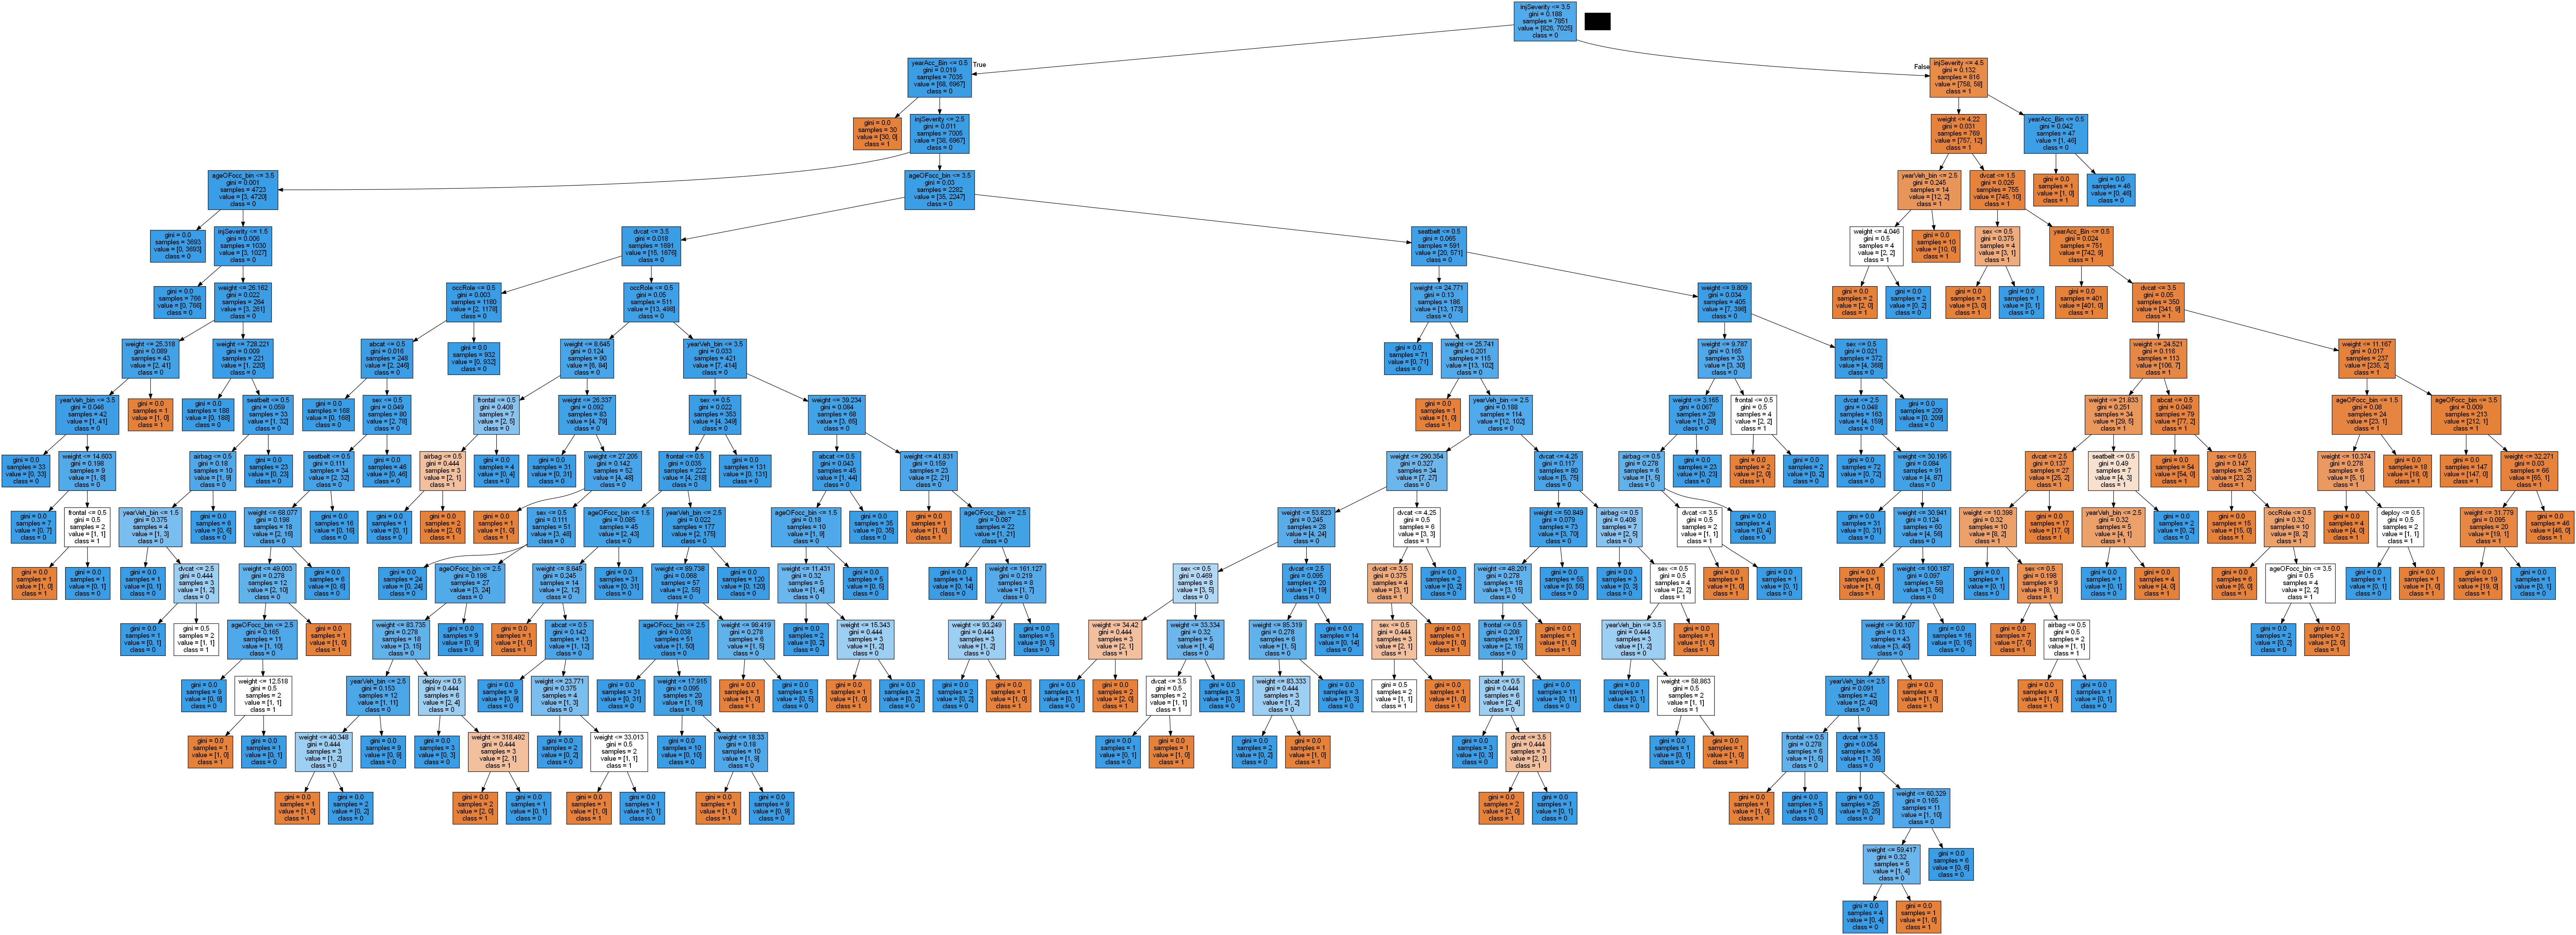

In [80]:
Image(graph[0].create_png())

In [81]:
#dtree.feature_importances_
imp_df_dtree =pd.DataFrame(dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df_dtree['Imp'].sort_values()

occRole         0.001082
abcat           0.001437
deploy          0.001581
seatbelt        0.001953
airbag          0.002816
ageOFocc_bin    0.003249
sex             0.003514
yearVeh_bin     0.003794
frontal         0.004831
dvcat           0.005695
weight          0.035250
yearAcc_Bin     0.041527
injSeverity     0.893271
Name: Imp, dtype: float64

The tree is too eloborate

In [82]:
reg_dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
reg_dtree.fit(X_train, y_train)
cData_dot_data = StringIO()
export_graphviz(reg_dtree,out_file= cData_dot_data,feature_names=list(X_train), filled=True,class_names=train_char_label)
graph = pydot.graph_from_dot_data(cData_dot_data.getvalue())

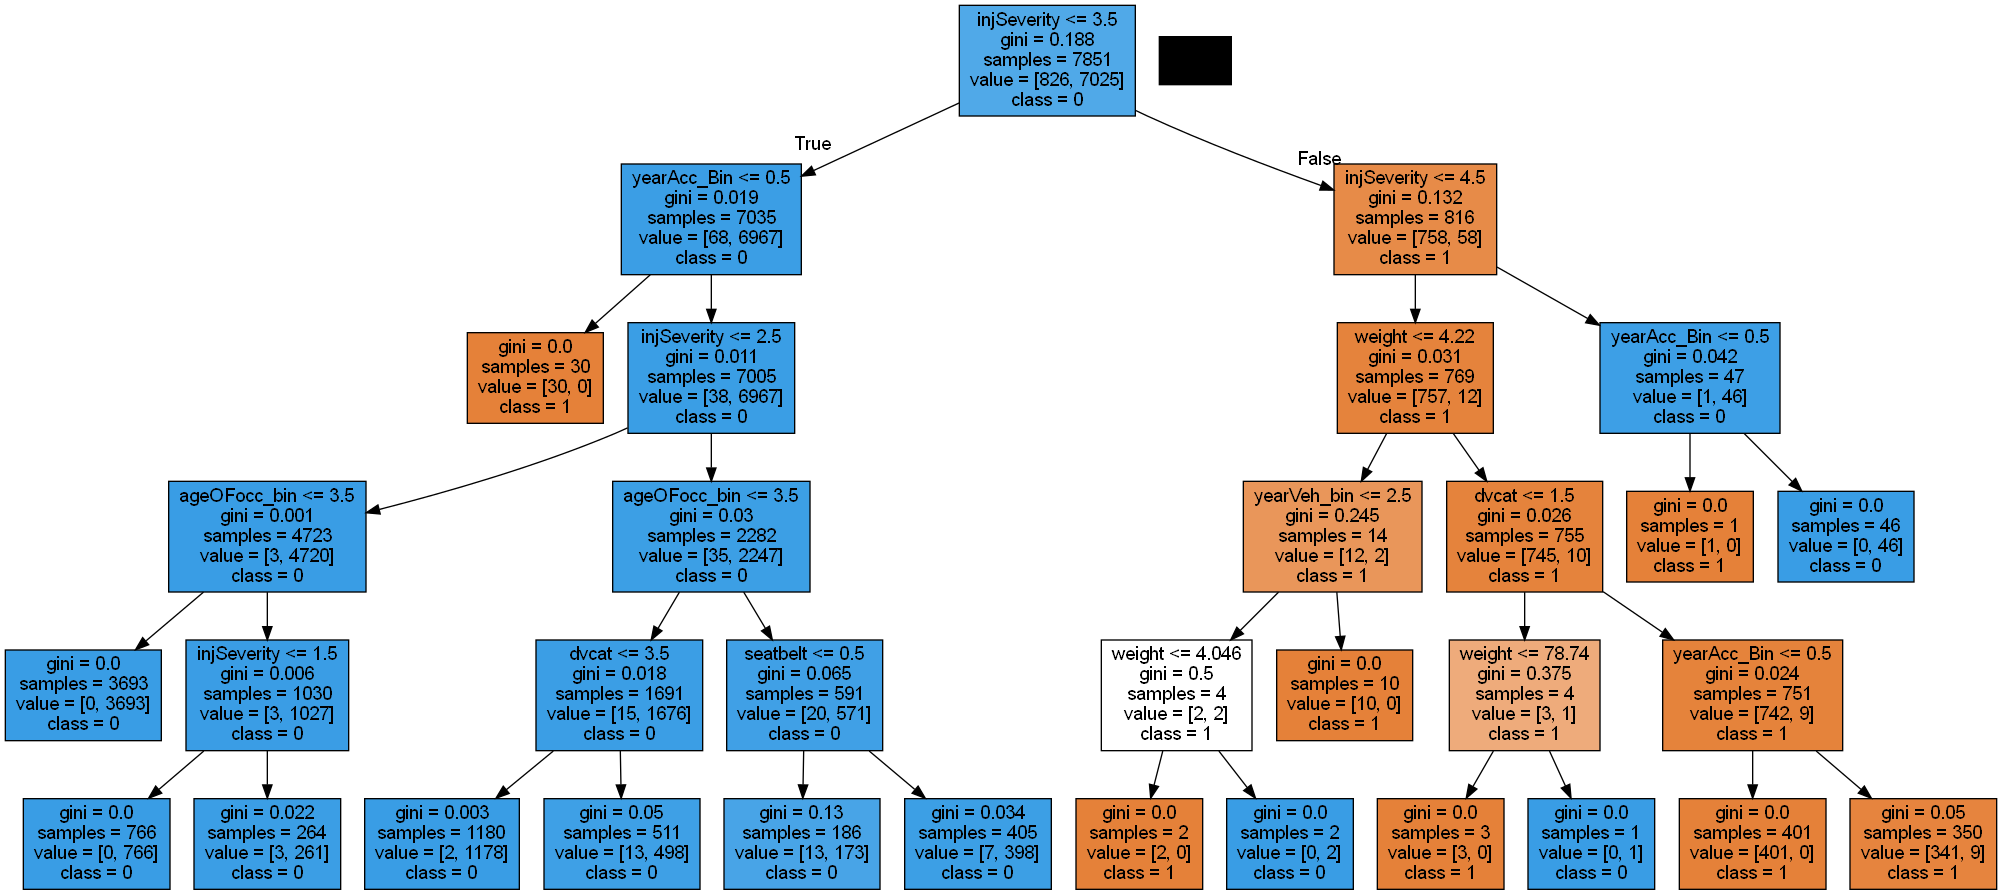

In [83]:
Image(graph[0].create_png())

In [84]:
#dtree.feature_importances_
imp_df_reg_dtree =pd.DataFrame(reg_dtree.feature_importances_, columns=['Imp'], index=X_train.columns)
imp_df_reg_dtree['Imp'].sort_values()

airbag          0.000000
frontal         0.000000
sex             0.000000
abcat           0.000000
occRole         0.000000
deploy          0.000000
ageOFocc_bin    0.000403
seatbelt        0.000509
dvcat           0.000615
yearVeh_bin     0.001030
weight          0.002855
yearAcc_Bin     0.044183
injSeverity     0.950405
Name: Imp, dtype: float64

The features with 0 importance can be dropped for CART Classification.

In [85]:
# Define the models
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('LDA', LinearDiscriminantAnalysis(n_components=1)),
          ('CART', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0))]

## 2.3 Performance Metrics:
Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [86]:
# define empty lists to contain the performance metrics:

model_names = []
accuracy_train = []
accuracy_test = []
confusion_train = []
confusion_test = []
report_train = []
report_test = []
roc_auc_train = []
roc_auc_test =[]

Empty lists are created to store the performance metrics like accuracy, ROC_AUC Score, Confusion Matrix, Classification Report

### Confusion Matrix

In [87]:
def conf_mat(y_test, y_predict):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Contraception Yes', 'Contraception No']
    plt.title('Confusion Matrix - Test Data for {} Model'.format(model))
    plt.ylabel('Actual (True) label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    plt.xticks(rotation=45)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [88]:
y_true = np.array(['-1', '1', '1', '-1'])
y_true[y_true == '-1'] = 0  # convert to {0, 1}
y_true[y_true == '1'] = 1
y_true = y_true.astype(int)

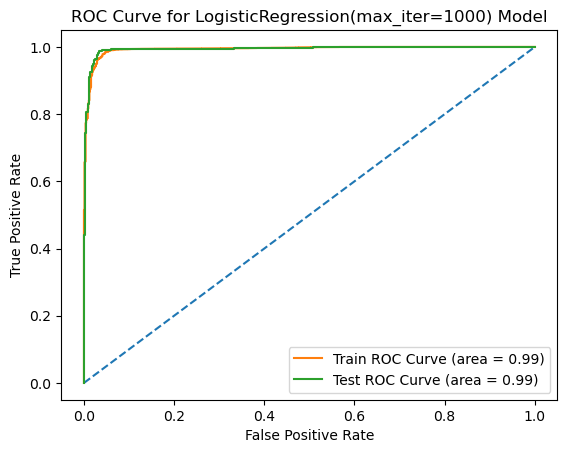

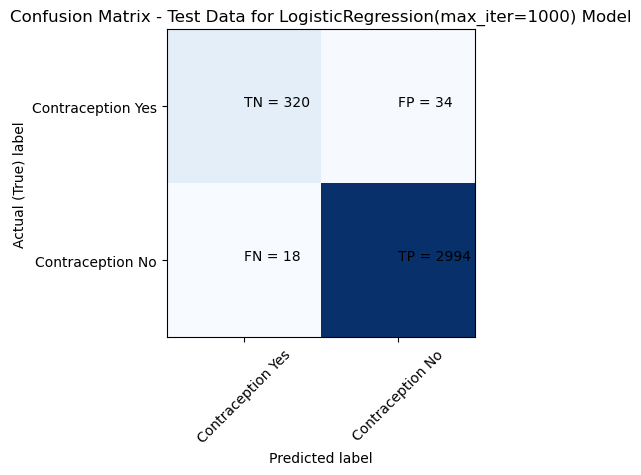

Model:  Logistic Regression
Confusion Matrix for Train Data:
[[ 746   80]
 [  48 6977]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.95      0.96      7851
weighted avg       0.98      0.98      0.98      7851

-----------------------
Model:  Logistic Regression
Confusion Matrix for Test Data:
[[ 320   34]
 [  18 2994]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.97      0.95      0.96      3366
weighted avg       0.98      0.98      0.98      3366

-----------------------


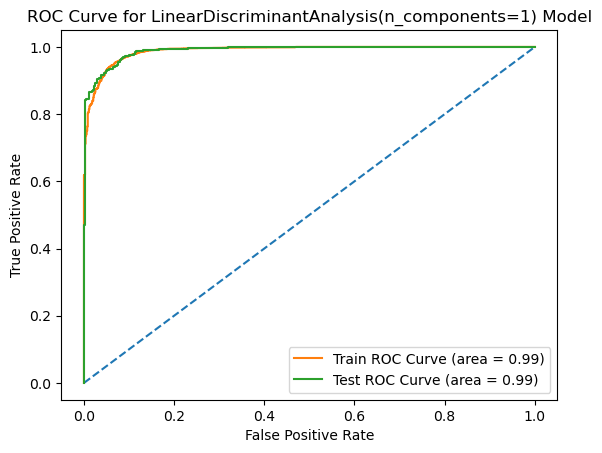

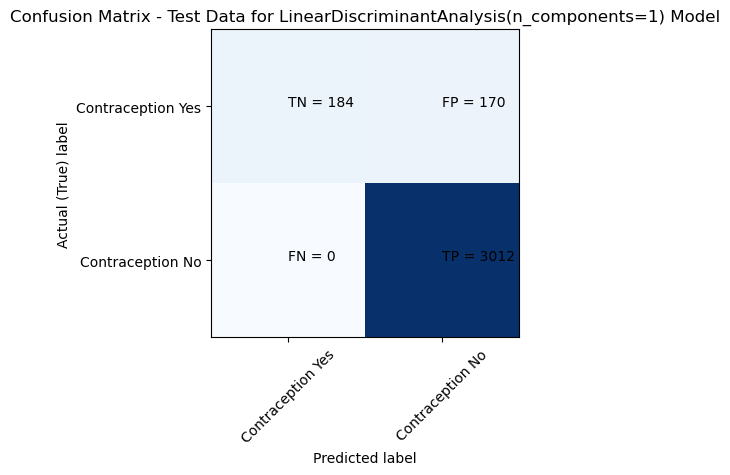

Model:  LDA
Confusion Matrix for Train Data:
[[ 438  388]
 [   0 7025]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69       826
           1       0.95      1.00      0.97      7025

    accuracy                           0.95      7851
   macro avg       0.97      0.77      0.83      7851
weighted avg       0.95      0.95      0.94      7851

-----------------------
Model:  LDA
Confusion Matrix for Test Data:
[[ 184  170]
 [   0 3012]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       354
           1       0.95      1.00      0.97      3012

    accuracy                           0.95      3366
   macro avg       0.97      0.76      0.83      3366
weighted avg       0.95      0.95      0.94      3366

-----------------------


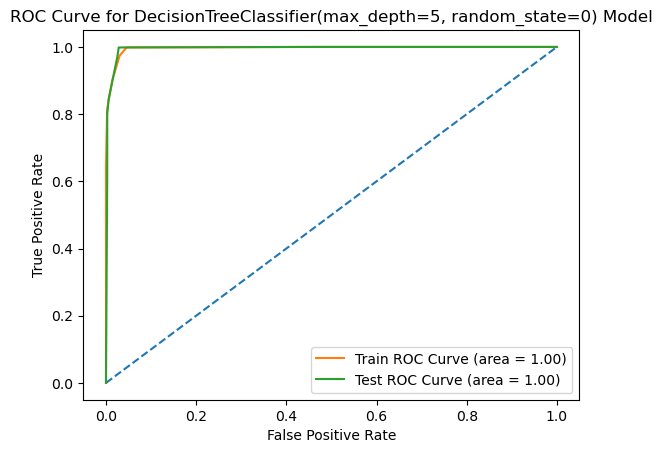

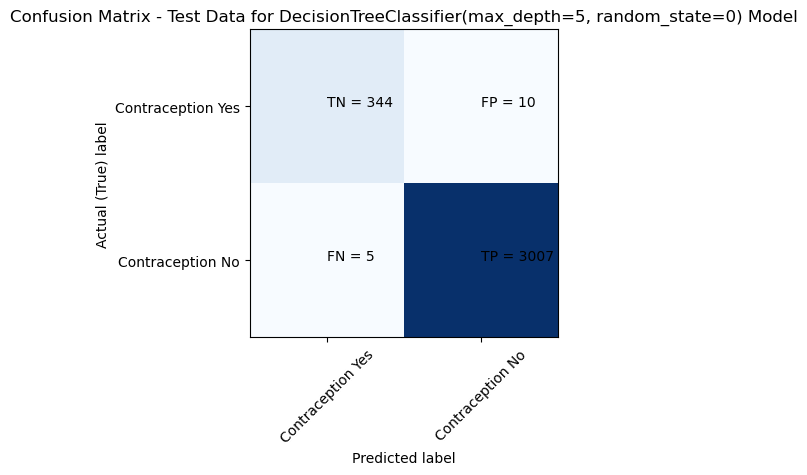

Model:  CART
Confusion Matrix for Train Data:
[[ 788   38]
 [   9 7016]]
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       826
           1       0.99      1.00      1.00      7025

    accuracy                           0.99      7851
   macro avg       0.99      0.98      0.98      7851
weighted avg       0.99      0.99      0.99      7851

-----------------------
Model:  CART
Confusion Matrix for Test Data:
[[ 344   10]
 [   5 3007]]
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       354
           1       1.00      1.00      1.00      3012

    accuracy                           1.00      3366
   macro avg       0.99      0.99      0.99      3366
weighted avg       1.00      1.00      1.00      3366

-----------------------


In [89]:
# loop through the models
for name, model in models:

    # fit the model on the training data
    model.fit(X_train, y_train)

    # predict the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the performance metrics

    accuracy_train_score = accuracy_score(y_train, y_pred_train)
    accuracy_test_score = accuracy_score(y_test, y_pred_test)
    confusion_train_score = confusion_matrix(y_train, y_pred_train)
    confusion_test_score = confusion_matrix(y_test, y_pred_test)
    report_train_score = classification_report(y_train, y_pred_train)
    report_test_score = classification_report(y_test, y_pred_test)

    # Get the predicted probabilities for train and test data
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the roc_auc_score for train and test data
    train_roc_auc_score = roc_auc_score(y_train, y_train_proba)
    test_roc_auc_score = roc_auc_score(y_test, y_test_proba)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot ROC curves
    plt.plot(train_fpr, train_tpr, label='Train ROC Curve (area = %0.2f)' % train_roc_auc_score)
    plt.plot(test_fpr, test_tpr, label='Test ROC Curve (area = %0.2f)' % test_roc_auc_score)


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} Model".format(model))
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Confusion Matrix
    conf_mat(y_test, y_pred_test)
    
    # Print the confusion matrix and classification report for train data
    print('Model: ', name)
    print('Confusion Matrix for Train Data:')
    print(confusion_matrix(y_train, y_pred_train))
    print('Classification Report for Train Data:')
    print(classification_report(y_train, y_pred_train))
    print('-----------------------')
    
    # Print the confusion matrix and classification report for test data
    print('Model: ', name)
    print('Confusion Matrix for Test Data:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report for Test Data:')
    print(classification_report(y_test, y_pred_test))
    print('-----------------------')

    # append the results to the respective lists
    model_names.append(name)
    accuracy_train.append(accuracy_train_score)
    accuracy_test.append(accuracy_test_score)
    confusion_train.append(confusion_train_score)
    confusion_test.append(confusion_test_score)
    report_train.append(report_train_score)
    report_test.append(report_test_score)
    roc_auc_train.append(train_roc_auc_score)
    roc_auc_test.append(test_roc_auc_score)

In [92]:
# create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (train)': accuracy_train,
    'Accuracy (test)': accuracy_test,
    'ROC AUC (train)': roc_auc_train,
    'ROC AUC (test)': roc_auc_test
})

### Best Model

In [93]:
results_df

,Model,Accuracy (train),Accuracy (test),ROC AUC (train),ROC AUC (test)
0,Logistic Regression,0.983696,0.984551,0.992921,0.993180
1,LDA,0.950580,0.949495,0.988160,0.989057
2,CART,0.994014,0.995544,0.996206,0.995316


Both Logistic Regression and CART models consistently perform well in terms of F1-score and accuracy across both iterations. They achieve F1-scores above 0.90 and high accuracies for both the train and test data.

LDA, on the other hand, shows lower F1-scores and accuracies compared to the other models

CART consistently outperforms the other models in terms of F1-score and accuracy, achieving perfect scores in most cases.

Logistic Regression performs slightly better than LDA, achieving higher F1-scores and accuracies.

Considering the high performance of CART and Logistic Regression, they can be considered as strong models for predicting the classification task.

## 2.4 Inference:
Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

1.	The injSeverity, year of accident, weight, impact speed are the important features in determining the ‘Survived’ class. Conduct safety awareness programs and monitor ‘airbags’ or similar safety features.

2.	Age and car model did not actor is as much contrary to popular belief. We can suggest hence to keep collecting data to understand hotspots, trends. And keep updating the safety policies. As, regular evaluation and updates to road safety policies based on emerging research.


## Reflection Report

Please reflect on all that you learnt and fill this reflection report. You have to copy the link and paste it on the URL bar of your respective browser.
https://docs.google.com/forms/d/e/1FAIpQLScKuVyrmTTM7Pboh0IB4YIBUbJp2NrDZcsY4SCRn3ZUkwmLGg/viewform